# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [ ]:
#📥 Import et configuration
import requests
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
import os
from dotenv import load_dotenv
import plotly.express as px

# Charger le fichier .env
load_dotenv()

OWM_API_KEY = os.getenv('OWM_API_KEY')

🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [2]:
BASE_URL = "https://api.openweathermap.org/data/2.5"

def get_weather_data(city, api_key):
    """
    Récupère les données météo actuelles pour une ville

    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    # URL : current weather data
    # Weather permet d'annoncer qu'on veut les données météos actuelles
    url = f"{BASE_URL}/weather"

    # Paramètres à compléter qu'on va envoyer à l'API
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',  # Celsius
        'lang': 'fr'
    }

    # 2. Faire l'appel API avec requests.get()
    # Requête HHTP = response contiendra la réponse de l'API
    response = requests.get(url, params=params)
    
    # 3. Vérifier le status code
    # 200 = OK / 404 = Non trouvé / 401 = Problème de l'API / 429 = Trop de requêtes envoyées
    print(f"Status code: {response.status_code}")
    
    # Gérez les erreurs HTTP !
    # Si tout va bien (code 200) alors on va demander la réponse en JSON
    if response.status_code == 200:
        # 4. Retourner les données JSON
        return response.json()
    # Si il y a des soucis alors on affiche un message d'erreur
    elif response.status_code == 401:
        raise Exception("Clé API invalide")
    elif response.status_code == 404:
        raise Exception(f"Ville '{city}' introuvable")
    elif response.status_code == 429:
        raise Exception("Limite de requêtes dépassée")
    else:
        raise Exception(f"Erreur API: {response.status_code}")

# Test de la fonction
if __name__ == "__main__": #Cette ligne permet de protéger du code de test pour qu’il ne s’exécute que si 
                            # le fichier est lancé directement.
    api_key = os.getenv('OWM_API_KEY')
    weather = get_weather_data("Madrid", api_key)
    print(f"Ville étudiée : {weather['name']}")
    print(f"Température: {weather['main']['temp']}°C")

Status code: 200
Ville étudiée : Madrid
Température: 26.17°C


In [3]:
# # Configuration API
# API_KEY = "V79ad430401410c1548779e39d652cdea"  # Remplacez par votre vraie clé
# BASE_URL = "http://api.openweathermap.org/data/2.5"

# # Villes à analyser (agriculture européenne)
# CITIES = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]

# Configuration API
api_key = os.getenv('OWM_API_KEY')
BASE_URL = "https://api.openweathermap.org/data/2.5"

# Villes à analyser (agriculture européenne)
CITIES = ["Paris", "Berlin", "Madrid", "Amsterdam", "Vienna"]

def get_weather_data(city, api_key):
    """
    Récupère les données météo actuelles pour une ville
    """
    url = f"{BASE_URL}/weather"
    
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',
        'lang': 'fr'
    }
    
    response = requests.get(url, params=params)
    print(f"Status code: {response.status_code}")
    
    # Gérez les erreurs HTTP !
    # Si tout va bien (code 200) alors on va demander la réponse en JSON
    if response.status_code == 200:
        # 4. Retourner les données JSON
        return response.json()
    # Si il y a des soucis alors on affiche un message d'erreur
    elif response.status_code == 401:
        raise Exception("Clé API invalide")
    elif response.status_code == 404:
        raise Exception(f"Ville '{city}' introuvable")
    elif response.status_code == 429:
        raise Exception("Limite de requêtes dépassée")
    else:
        raise Exception(f"Erreur API: {response.status_code}")

# Analyser toutes les villes
for city in CITIES:
    print(f"Ville: {city}")
    weather = get_weather_data(city, api_key)
    print(f"Température: {weather['main']['temp']}°C")
    print(f"Description: {weather['weather'][0]['description']}")
    print()




Ville: Paris
Status code: 200
Température: 24.03°C
Description: ciel dégagé

Ville: Berlin
Status code: 200
Température: 22.03°C
Description: nuageux

Ville: Madrid
Status code: 200
Température: 26.17°C
Description: ciel dégagé

Ville: Amsterdam
Status code: 200
Température: 21.9°C
Description: peu nuageux

Ville: Vienna
Status code: 200
Température: 21.16°C
Description: peu nuageux



**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ?
Si il y a des soucis alors on affiche un message d'erreur
    elif response.status_code == 401:
        raise Exception("Clé API invalide")


- Comment gérer une ville introuvable ?
    elif response.status_code == 404:
        raise Exception(f"Ville '{city}' introuvable")
---

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [4]:
# Charger la clé API Visual Crossing Weather depuis le fichier .env
api_key = os.getenv('VC_API_KEY')

# Base URL Visual Crossing
VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"

# Liste de villes
villes = ["Paris","Madrid", "Berlin", "Amsterdam", "Vienna"]  # Tu peux remplacer ou compléter

# Dates de début et fin sur les 30 derniers jours (ici que 7 jours car souvis de maximum requête)
start_date = (dt.datetime.today() - dt.timedelta(days=7)).date()
end_date = dt.datetime.today().date()


# Fonction de récupération météo
def get_historical_weather(city, start_date, end_date, api_key):
    url = f"{VC_BASE_URL}{city}/{start_date.isoformat()}/{end_date.isoformat()}"
    params = {
        'key': api_key,
        'include': 'days',
        'elements': 'datetime,temp,humidity,precip,windspeed',
        'unitGroup': 'metric',
        'contentType': 'json'
    }

    response = requests.get(url, params=params, timeout=15)
    print(f"{city} – status {response.status_code}")
    response.raise_for_status()  # Lève une erreur si le code HTTP n’est pas 200

    return response.json()


# Boucle sur les villes + collecte des données
all_data = []

for ville in villes:
    try:
        data = get_historical_weather(ville, start_date, end_date, api_key)
        for day in data['days']:
            all_data.append({
                'date': day['datetime'],
                'ville': ville,
                'temperature': day['temp'],
                'humidite': day['humidity'],
                'precipitation': day['precip'],
                'vent': day['windspeed']
            })
    except Exception as e:
        print(f"!! Erreur pour {ville} : {e}")


# Création du DataFrame final
df = pd.DataFrame(all_data)
print(df.head())

Paris – status 200
Madrid – status 200
Berlin – status 200
Amsterdam – status 200
Vienna – status 200
         date  ville  temperature  humidite  precipitation  vent
0  2025-07-22  Paris         19.2      71.0          0.052  16.8
1  2025-07-23  Paris         19.2      74.3          2.018  13.5
2  2025-07-24  Paris         18.4      83.8         12.440  15.4
3  2025-07-25  Paris         20.7      72.8          0.010  12.2
4  2025-07-26  Paris         21.4      67.6          0.000  16.0


### 🎯 Mission pratique
Récupérez les données des 30 derniers jours pour toutes vos villes et créez un DataFrame consolidé.

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


## Partie 3 : API supplémentaire - Qualité de l'air

In [5]:
### Obtenir les coordonnées
GEOCODING_URL = "http://api.openweathermap.org/geo/1.0/direct"

def get_city_coordinates(city, api_key):
    """
    Récupère les coordonnées (latitude, longitude) d'une ville
    via l'API de géocodage OpenWeatherMap.

    Retourne un tuple (lat, lon)
    """
    params = {
        'q': city,
        'limit': 1,
        'appid': api_key
    }

    response = requests.get(GEOCODING_URL, params=params, timeout=10)
    response.raise_for_status()
    data = response.json()

    if not data:
        raise ValueError(f"Coordonnées introuvables pour la ville : {city}")

    lat = data[0]['lat']
    lon = data[0]['lon']
    return lat, lon

In [6]:
## Partie 3 : API supplémentaire - Qualité de l'air

BASE_URL = "http://api.openweathermap.org/data/2.5/air_pollution"

### API OpenWeatherMap Air Pollution
def get_air_quality(lat, lon, api_key):
    """
    Récupère les données de qualité de l'air pour des coordonnées données.

    Renvoie un dictionnaire contenant :
    - aqi
    - pm2_5
    - pm10
    - o3
    - no2
    - so2
    - co
    """
    params = {
        'lat': lat,
        'lon': lon,
        'appid': api_key
    }

    response = requests.get(BASE_URL, params=params, timeout=10)
    response.raise_for_status()

    data = response.json()
    aqi_data = data['list'][0]

    return {
        'aqi': aqi_data['main']['aqi'],
        'pm2_5': aqi_data['components']['pm2_5'],
        'pm10': aqi_data['components']['pm10'],
        'o3': aqi_data['components']['o3'],
        'no2': aqi_data['components']['no2'],
        'so2': aqi_data['components']['so2'],
        'co': aqi_data['components']['co']
    }



In [7]:
# séparer l'appel des API de l’exécution principale
if __name__ == "__main__":
    villes = ["Paris","Madrid", "Berlin", "Amsterdam", "Vienna"]
    all_air_data = []

    for ville in villes :
        lat, lon = get_city_coordinates(ville, OWM_API_KEY)
        air_quality = get_air_quality(lat, lon, OWM_API_KEY)
        air_quality['ville'] = ville
        all_air_data.append(air_quality)

    df_air = pd.DataFrame(all_air_data)

    # Réorganiser les colonnes pour avoir 'ville' en premier
    colonnes = ['ville', 'aqi', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
    df_air = df_air[colonnes]

    
    print(df_air)


       ville  aqi  pm2_5  pm10     o3   no2   so2      co
0      Paris    2   1.21  1.67  74.74  0.61  0.17  116.86
1     Madrid    2   1.47  2.86  97.30  0.46  0.10  106.45
2     Berlin    2   0.72  0.95  80.01  0.75  0.46  117.59
3  Amsterdam    2   2.70  3.38  63.91  9.73  2.54  141.95
4     Vienna    1   0.80  0.92  55.40  1.48  0.47  124.24



## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

In [8]:
### 💡 Visualisations guidées

# 1. Heatmap des températures par ville et jour
plt.figure(figsize=(15, 8))
# Créez un pivot table : villes en colonnes, dates en lignes
# Utilisez seaborn.heatmap()


# 2. Boxplot comparatif des précipitations pour les villes
# Utilisez seaborn.boxplot()


# 3. Scatter plot qualité air vs température pour les villes
# Ajoutez une regression line avec seaborn.regplot()


# 4. Vision de l'évolution temporelle de la température pour plusieurs villes
## Un graphe avec plotly et un avec matplotlyb



<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

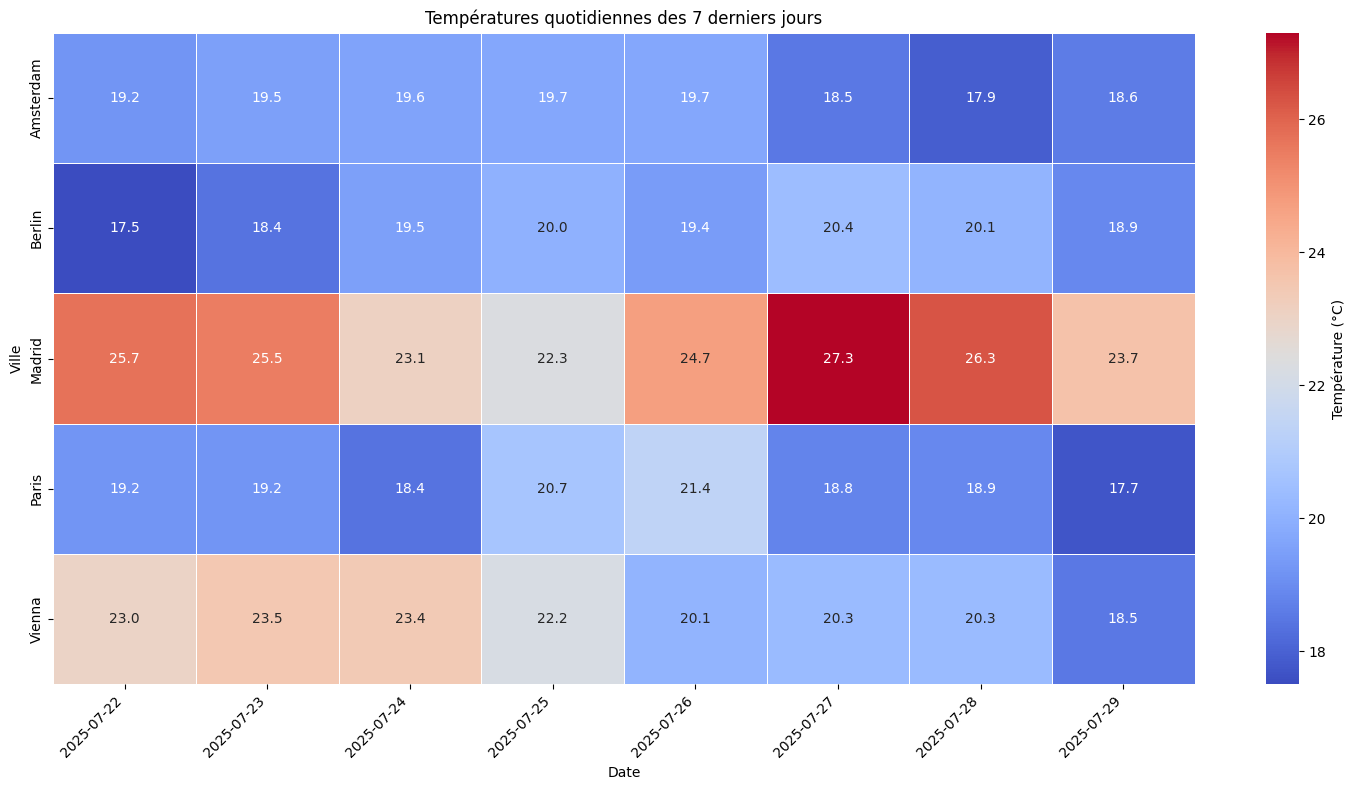

In [9]:
# # 1. Heatmap des températures par ville et jour
# ## plt.figure(figsize=(15, 8))

plt.figure(figsize=(15, 8))

# Pivot pour avoir (villes × dates) avec la température
heatmap_df = (
    df.pivot(index='ville', columns='date', values='temperature')
      .sort_index(axis=1)               # dates dans l’ordre
)

sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    cbar_kws={'label': 'Température (°C)'},
    linewidths=.5
)

plt.title('Températures quotidiennes des 7 derniers jours')
plt.xlabel('Date')
plt.ylabel('Ville')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_42640/642447106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


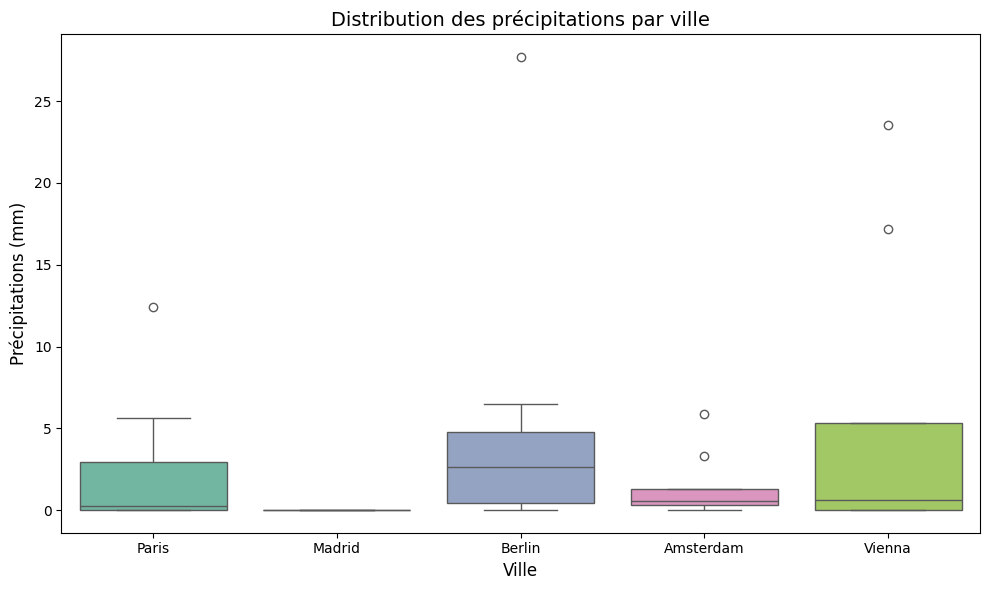

In [10]:
# 2. Boxplot comparatif des précipitations pour les villes
# Utilisez seaborn.boxplot()
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='ville',
    y='precipitation',
    palette='Set2'
)

plt.title('Distribution des précipitations par ville', fontsize=14)
plt.xlabel('Ville', fontsize=12)
plt.ylabel('Précipitations (mm)', fontsize=12)
plt.tight_layout()
plt.show()





         date  ville  temperature  humidite  precipitation  vent  aqi  pm2_5  \
0  2025-07-22  Paris         19.2      71.0          0.052  16.8    2   1.21   
1  2025-07-23  Paris         19.2      74.3          2.018  13.5    2   1.21   
2  2025-07-24  Paris         18.4      83.8         12.440  15.4    2   1.21   
3  2025-07-25  Paris         20.7      72.8          0.010  12.2    2   1.21   
4  2025-07-26  Paris         21.4      67.6          0.000  16.0    2   1.21   

   pm10     o3   no2   so2      co  
0  1.67  74.74  0.61  0.17  116.86  
1  1.67  74.74  0.61  0.17  116.86  
2  1.67  74.74  0.61  0.17  116.86  
3  1.67  74.74  0.61  0.17  116.86  
4  1.67  74.74  0.61  0.17  116.86  
Index(['date', 'ville', 'temperature', 'humidite', 'precipitation', 'vent',
       'aqi', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co'],
      dtype='object')


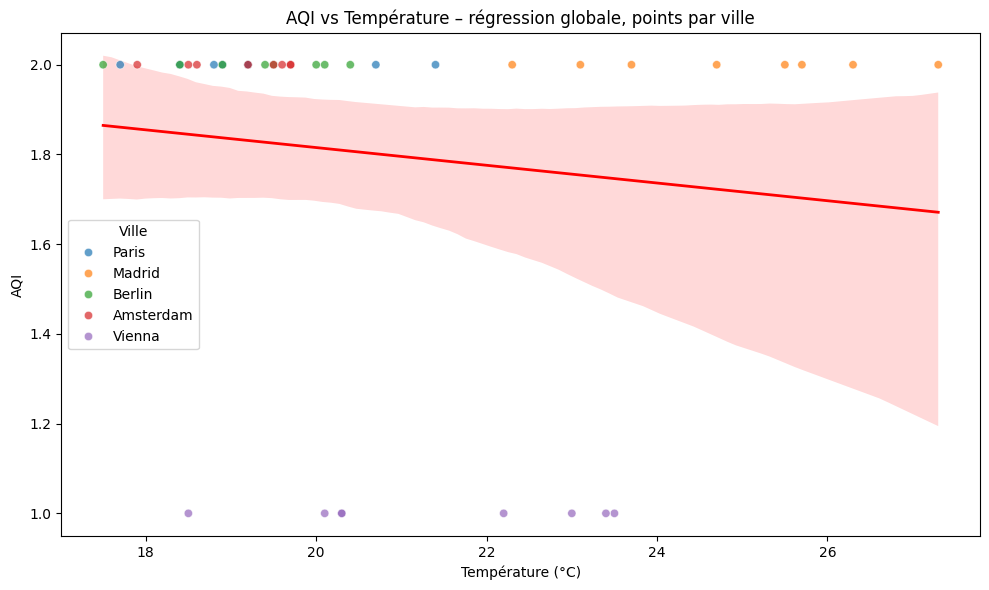

In [11]:
# 3. Scatter plot qualité air vs température pour les villes
# Ajoutez une regression line avec seaborn.regplot()

# 1. Fusion « left » : on ajoute les colonnes d’air à chaque ligne météo
df_merged = pd.merge(df, df_air, on='ville', how='left')

# 2. Vérification rapide
print(df_merged.head())
print(df_merged.columns)

# # 3. Scatter plot qualité air vs température avec ligne de régression
# plt.figure(figsize=(10, 6))

# sns.lmplot(   # Faire un regplot
#     data=df_merged,
#     x='temperature',
#     y='aqi',
#     hue='ville',
#     height=6,
#     aspect=1.5,
#     scatter_kws={'alpha': 0.7},
#     line_kws={'lw': 2}
# )

# plt.title('Qualité de l’air (AQI) vs Température')
# plt.xlabel('Température (°C)')
# plt.ylabel('AQI')
# plt.tight_layout()
# plt.show()

# 3. Scatter plot avec regression line via regplot
# 3. Scatter plot avec regression line via regplot
plt.figure(figsize=(10, 6))

# 1) Droite de régression globale (sans points)
sns.regplot(
    data=df_merged,
    x='temperature',
    y='aqi',
    scatter=False,                      # pas de points
    line_kws={'color': 'red', 'lw': 2}
)

# 2) Points colorés par ville
sns.scatterplot(
    data=df_merged,
    x='temperature',
    y='aqi',
    hue='ville',
    alpha=0.7
)

plt.title('AQI vs Température – régression globale, points par ville')
plt.xlabel('Température (°C)')
plt.ylabel('AQI')
plt.legend(title='Ville')
plt.tight_layout()
plt.show()

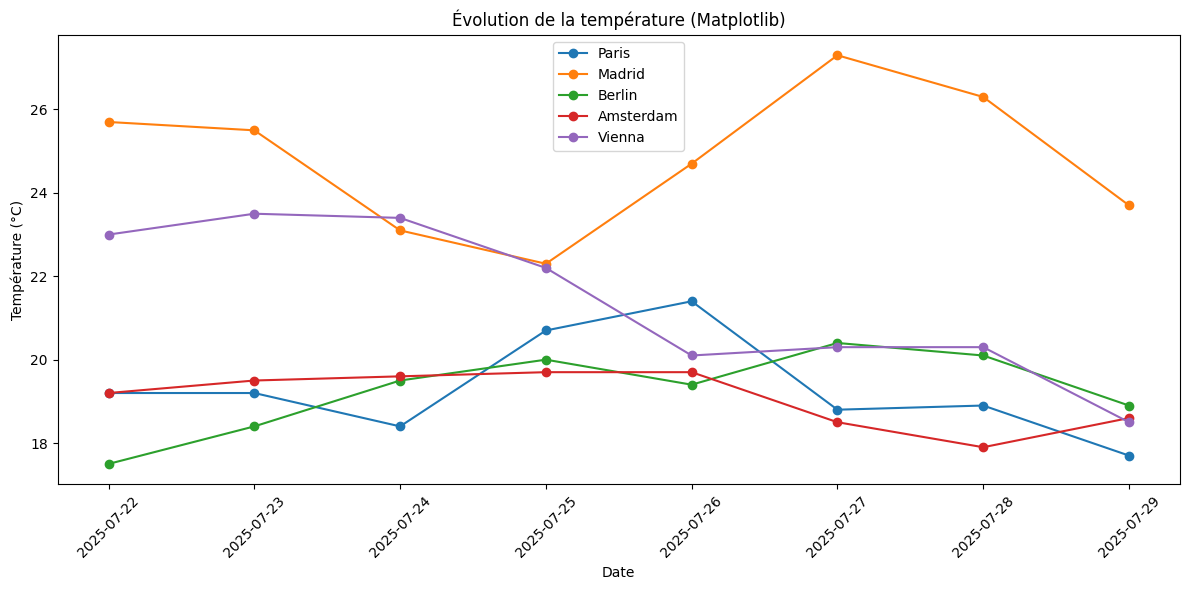

In [ ]:
# 4. Vision de l'évolution temporelle de la température pour plusieurs villes
## Un graphe avec plotly et un avec matplotlyb

fig = px.line(
    df,                       
    x='date',
    y='temperature',
    color='ville',
    markers=True,
    title='Évolution de la température avec Plotly interactif'
)
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Température (°C)')
fig.show()


#################

plt.figure(figsize=(12, 6))

for ville in df['ville'].unique():
    data_ville = df[df['ville'] == ville]
    plt.plot(data_ville['date'], data_ville['temperature'],
             marker='o', label=ville)

plt.title('Évolution de la température avec Matplotlib')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Partie 5 : API bonus - Données agricoles

### 🌱 API AgroMonitoring (gratuite)

In [13]:
# API satellite pour l'agriculture
AGRO_API_KEY = "VOTRE_CLE_AGROMONITORING"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

In [14]:
### Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    pass

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites